In [1]:
origem = (0,0)
destino = (4,4)

enderecos = [(2, 1), (2,2), (8, 3), (5, 3)]

In [2]:
rota = [origem] + enderecos + [destino]

In [3]:
rota

[(0, 0), (2, 1), (2, 2), (8, 3), (5, 3), (4, 4)]

In [4]:
!pip install matplotlib scipy

In [5]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean as distancia_euclidiana

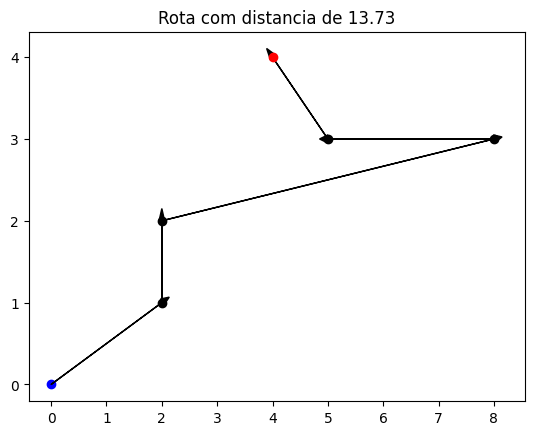

In [6]:
tamanho_rota = len(rota)
distancia_percorrida = 0

for i in range(tamanho_rota):
  x, y = rota[i]
  cor = "black"
  if i == 0:
    cor = "blue"
  elif i == tamanho_rota - 1:
    cor = "red"

  plt.scatter(x, y, color=cor)

  if i < tamanho_rota - 1:
    x1, y1 = rota[i+1]
    dx = x1 - x
    dy = y1 - y
    plt.arrow(x, y, dx, dy, color="black", head_width=0.1)
    distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])

plt.title(f"Rota com distancia de {round(distancia_percorrida, 2)}")
plt.show()

In [7]:
def desenhar_rota(rota):
    tamanho_rota = len(rota)
    distancia_percorrida = 0

    for i in range(tamanho_rota):
        x,y = rota[i]

        cor = "black"
        if i == 0:
            cor = "blue"
        elif i == tamanho_rota - 1:
            cor = "red"

        plt.scatter(x, y, color=cor)

        if i < tamanho_rota - 1:
            x1, y1 = rota[i+1]
            dx = x1 - x
            dy = y1 - y
            plt.arrow(x, y, dx, dy, color="black", head_width = 0.1)
            distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])

    plt.title(f'Rota com distancia de {round(distancia_percorrida, 2)}')
    plt.show()

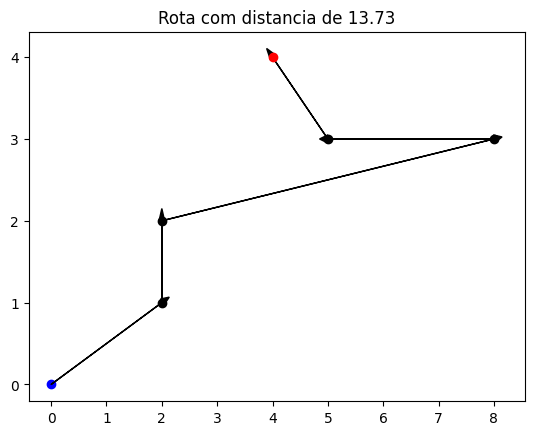

In [8]:
origem = (0,0)
destino = (4,4)
enderecos = [(2,1), (2, 2), (8, 3), (5, 3)]

rota = [origem] + enderecos + [destino]
desenhar_rota(rota)

In [9]:
enderecos = [(2,2), (2, 1), (8, 3), (5, 3)]

In [10]:
def calcular_distancia_rota(rota):
        distancia = 0
        tamanho_rota = len(rota)
        for i in range(tamanho_rota):
                if i < tamanho_rota - 1: 
                        distancia = distancia + distancia_euclidiana(rota[i], rota[i+1])
        return distancia

[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583


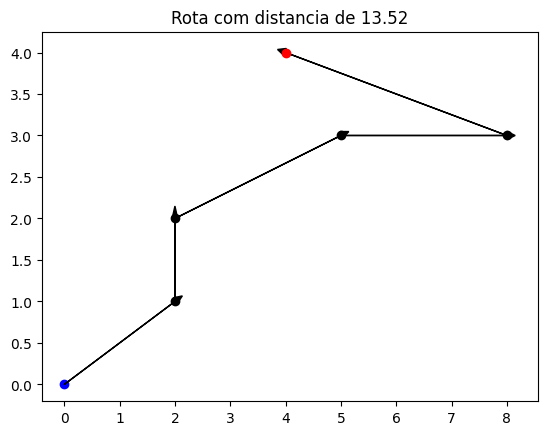

In [11]:
from itertools import permutations

menor_distancia = float('inf')
menor_rota = None

for permutacao in permutations(enderecos):
    rota = [origem] + list(permutacao) + [destino]
    distancia_rota = calcular_distancia_rota(rota)

    if distancia_rota < menor_distancia:
        menor_distancia = distancia_rota
        menor_rota = rota

print(menor_rota, menor_distancia)
desenhar_rota(menor_rota)

In [12]:
def forca_bruta(origem, destino, enderecos):
        menor_distancia = float('inf')
        menor_rota = None

        for permutacao in permutations(enderecos):
                rota = [origem] + list(permutacao) + [destino]
                distancia_rota = calcular_distancia_rota(rota)

                if distancia_rota < menor_distancia:
                        menor_distancia = distancia_rota
                        menor_rota = rota

        return menor_rota, menor_distancia

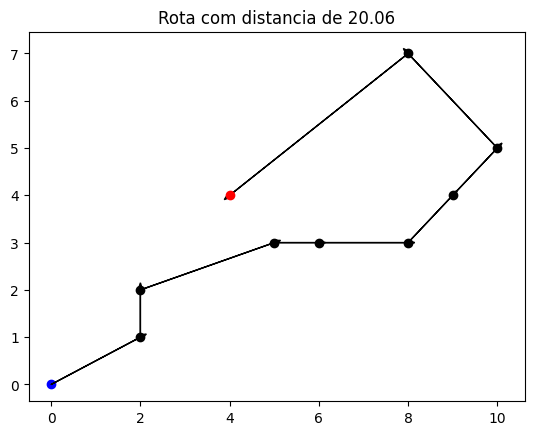

In [13]:
origem = (0,0)
destino = (4,4)

# enderecos = [(2,1), (2, 2), (8, 3), (5, 3)]
# enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4)]
enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3)]
# enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5)]

menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
desenhar_rota(menor_rota)

In [14]:
def vizinho_mais_proximo(origem, destino,enderecos):
    ponto_atual = origem
    enderecos_restantes = enderecos.copy()

    distancia_percorrida = 0
    menor_rota = [ponto_atual]

    while enderecos_restantes:
        # encontrar o ponto mais proximo do ponto atual
        menor_distancia = float('inf')
        ponto_mais_proximo = None
        for endereco in enderecos_restantes:
            distancia = distancia_euclidiana(ponto_atual, endereco)
            if distancia < menor_distancia:
                menor_distancia = distancia
                ponto_mais_proximo = endereco

        # remover esse ponto da lista de enderecos 
        enderecos_restantes.remove(ponto_mais_proximo) 
        # adicionar esse ponto na menor_rota 
        menor_rota.append(ponto_mais_proximo)
        # atualizar a distancia_percorrida 
        distancia_percorrida = distancia_percorrida + menor_distancia
        # atualizar o ponto atual 
        ponto_atual = ponto_mais_proximo

    menor_rota.append(destino)
    distancia_percorrida = distancia_percorrida + distancia_euclidiana (ponto_atual, destino)

    return menor_rota, distancia_percorrida

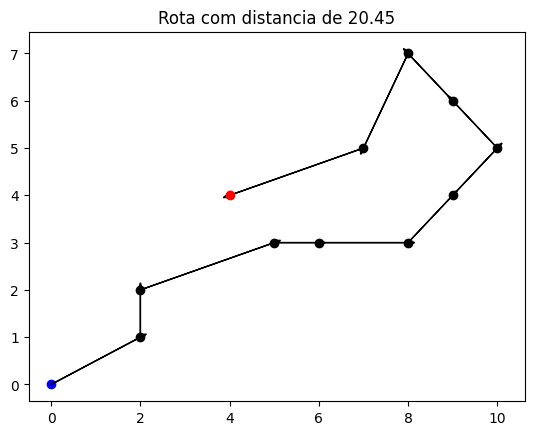

In [15]:
origem = (0,0)
destino = (4,4)

# enderecos = [(2,1), (2, 2), (8, 3), (5, 3)]
# enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4)]
# enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3)]
enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5)]

menor_rota, menor_distancia = vizinho_mais_proximo(origem, destino, enderecos)
desenhar_rota(menor_rota)

In [16]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3)]

individuo = [0,2,1,3]

def avaliar(individuo, origem, enderecos, destino):
    rota = [origem]
    for i in individuo:
        rota.append(enderecos[i])
    rota.append(destino)
    
    distancia_percorrida = calcular_distancia_rota(rota)
    
    return distancia_percorrida, 
avaliar(individuo, origem, enderecos, destino)

(np.float64(20.04391700633298),)

In [17]:
!pip install deap

In [18]:
from deap import base, creator, tools, algorithms
import numpy as np

In [19]:
tam_populacao_inicial = 100 
prob_cruzamento = 0.7 
prob_mutacao = 0.1 
numero_geracoes = 100

creator.create("FitnessMin", base.Fitness, weights=(-1.0, ))
creator.create("Individuo", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("Genes", np.random.permutation, len(enderecos))
toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
populacao = toolbox.Populacao(n=tam_populacao_inicial)

toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

algoritmo = algorithms.eaSimple(populacao,
                                  toolbox,
                                  cxpb=prob_cruzamento,
                                  mutpb=prob_cruzamento,
                                  ngen=numero_geracoes, 
                                  verbose=False) 
melhor_ind = tools.selBest(populacao, 1)[0]

In [20]:
melhor_ind

[np.int64(1), np.int64(0), np.int64(2), np.int64(3)]

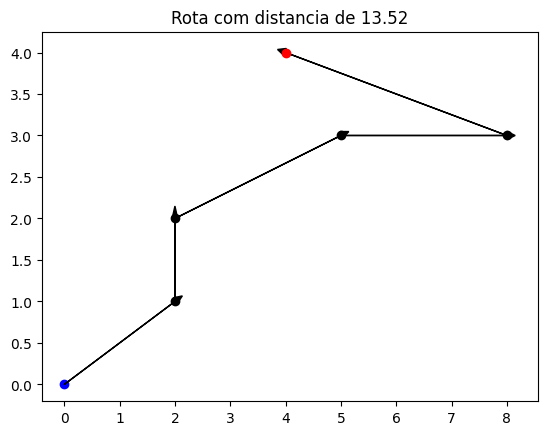

In [21]:
menor_rota = [origem]
for i in melhor_ind:
      menor_rota.append(enderecos[i])
menor_rota.append(destino)

desenhar_rota(menor_rota)

In [22]:
!pip install networkx

In [23]:
import networkx as nx

In [24]:
origem = (0,0)
destino = (4,4)

enderecos = [(2, 1), (2,2), (8, 3), (5, 3)]

0 (2, 1)
1 (2, 2)
2 (8, 3)
3 (5, 3)


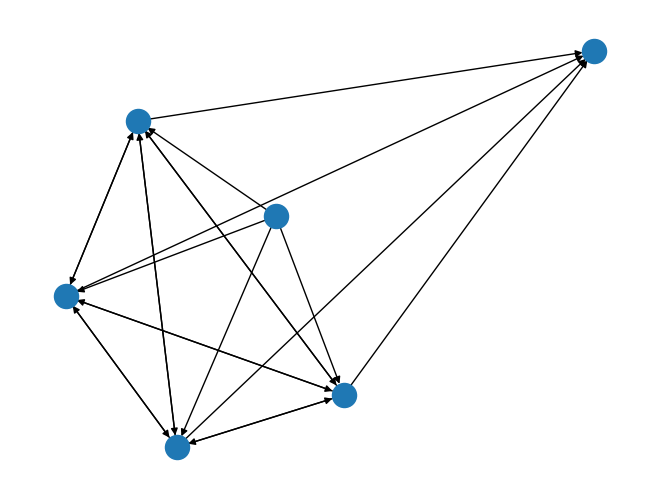

In [25]:
G = nx.DiGraph()
G.add_node('origem', local=origem)
G.add_node('destino', local=destino)

for i, endereco in enumerate(enderecos):
    print(i, endereco)
    G.add_node(i, local=endereco)
        
for i, endereco in enumerate(enderecos):
    G.add_edge('origem', i, distancia=distancia_euclidiana(origem, endereco))
    G.add_edge(i, 'destino', distancia=distancia_euclidiana(endereco, destino))
    for j, endereco2 in enumerate(enderecos):

        if i != j:
            G.add_edge(i, j, distancia=distancia_euclidiana(endereco, endereco2))

nx.draw(G)

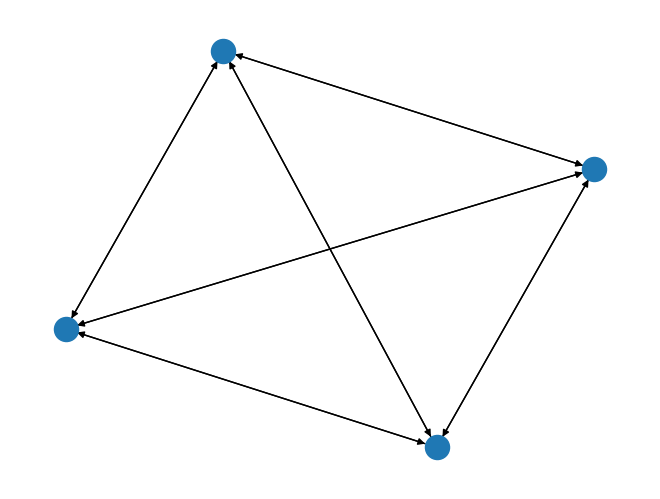

In [26]:
G_test = nx.DiGraph()

for i, endereco in enumerate(enderecos):
    G_test.add_node(i, local=endereco)

for i, endereco in enumerate(enderecos):
    for j, endereco2 in enumerate(enderecos):
        if i != j:
            G_test.add_edge(i, j, distancia=distancia_euclidiana(endereco, endereco2))

nx.draw(G_test)

In [27]:
tsp = nx.approximation.traveling_salesman_problem(G_test, weight="weight")
print(tsp)

[1, 0, 3, 2, 1]


In [28]:
def criar_grafo(origem, destino, enderecos, flag_fortemente_conexo=False):
  G = nx.DiGraph()
  # Adicionando o nó de origem ao grafo
  G.add_node('origem', local=origem)

  # Adicionando o nó de destino ao grafo
  G.add_node('destino', local=destino)

  for i, endereco in enumerate(enderecos):
    # Adicionando cada endereço como um nó no grafo
    G.add_node(i, local=endereco)

  for i, endereco in enumerate(enderecos):
    # Conectando cada endereço à origem e ao destino com o peso sendo a distância euclidiana
    G.add_edge('origem', i, weight=distancia_euclidiana(origem, endereco))
    G.add_edge(i, 'destino', weight=distancia_euclidiana(endereco, destino))
    for j, endereco2 in enumerate(enderecos):
      if i!=j:
        # Conectando cada endereço a todos os outros endereços
        G.add_edge(i, j, weight=distancia_euclidiana(endereco, endereco2))

  if flag_fortemente_conexo == True:
    # Conectando o destino de volta à origem para tornar o grafo fortemente conexo
    G.add_edge("destino", "origem", weight=0)

  return G  # Retornando o grafo criado

def algoritmo_em_grafo(origem, destino, enderecos):
  # Criando um grafo fortemente conexo
  G = criar_grafo(origem, destino, enderecos, flag_fortemente_conexo=True)

  # Resolvendo o problema do caixeiro viajante para encontrar o ciclo mais curto
  ciclo = nx.approximation.traveling_salesman_problem(G, weight="weight", cycle=False)

  indice_origem = ciclo.index("origem")  # Encontrando o índice da origem no ciclo
  ciclo_rotacionado = ciclo[indice_origem:] + ciclo[:indice_origem]  # Rotacionando o ciclo para começar pela origem

  ciclo_rotacionado.remove("origem")  # Removendo o nó de origem do ciclo
  ciclo_rotacionado.remove("destino")  # Removendo o nó de destino do ciclo

  melhor_rota = [origem]  # Inicializando a melhor rota com a origem

  for i in ciclo_rotacionado:
    # Adicionando cada endereço da melhor rota encontrada
    melhor_rota.append(enderecos[i])
  melhor_rota.append(destino)  # Adicionando o destino ao final da melhor rota

  # Calculando a distância total percorrida na melhor rota
  distancia_percorrida = calcular_distancia_rota(melhor_rota)

  return melhor_rota, distancia_percorrida  # Retornando a melhor rota e a distância total percorrida

[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583


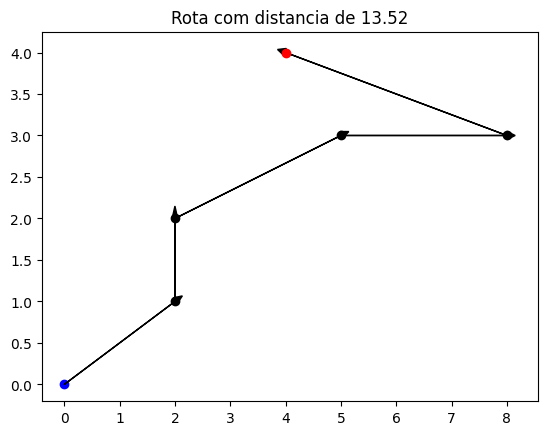

In [29]:
melhor_rota, distancia_percorrida = algoritmo_em_grafo(origem,destino,enderecos)
print(melhor_rota, distancia_percorrida)
desenhar_rota(melhor_rota)

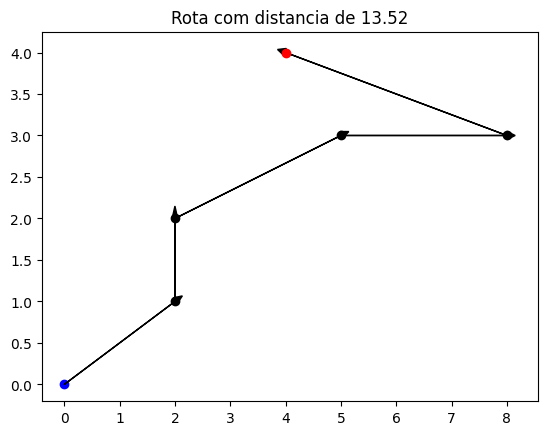

In [30]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,1), (2, 2), (8, 3), (5, 3)]
# enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4)]
# enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3)]
# enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5)]

menor_rota, menor_distancia = algoritmo_em_grafo(origem, destino, enderecos)
desenhar_rota(menor_rota)

In [31]:
!pip install ortools

In [33]:
from ortools.linear_solver import pywraplp

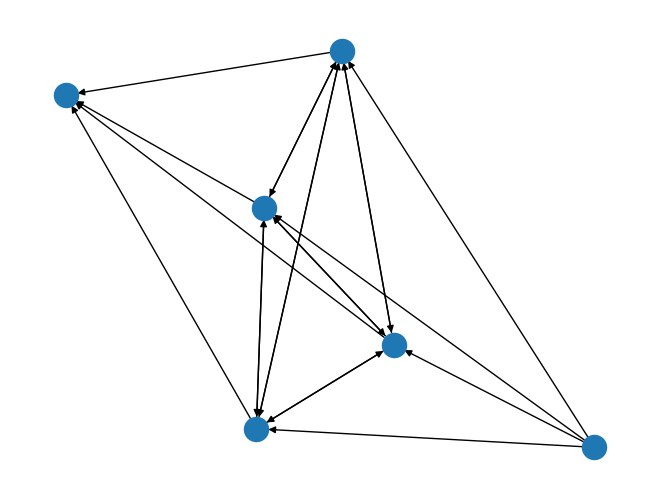

In [63]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,1), (2, 2), (8, 3), (5, 3)]

G = criar_grafo(origem, destino, enderecos)
nx.draw(G)

In [64]:
G.get_edge_data(0, 3)['weight']

np.float64(3.605551275463989)

In [65]:
n = G.number_of_nodes()
print(n)
G.nodes()

6


NodeView(('origem', 'destino', 0, 1, 2, 3))

In [68]:
modelo = pywraplp.Solver.CreateSolver('SCIP')

x = {}
for i,j in G.edges():
	x[(i,j)] = modelo.BoolVar(name=f"x[{i,j}]")

u = {}
for i in G.nodes():
  u[i] = modelo.NumVar(lb=1.0, ub=n, name=f"u[{i}]")


modelo.Minimize(sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges()))

for i in G.nodes():
	if i != 'destino':
		modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)
	if i != 'origem':
		modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

for i, j  in G.edges():
	modelo.Add(u[i] - u[j] + n*x[i,j] <= n - 1)

In [69]:
status = modelo.Solve()

In [79]:
if status == pywraplp.Solver.OPTIMAL:
  print("Solução Otima")
  print("Distância total percorrida: ", modelo.Objective().Value())
  for i, j in G.edges():
  	if x[i,j].solution_value() > 0:
		  print(f"De {i} para {j} com distância {G.get_edge_data(i,j)['weight']}") 	
  for i in G.nodes():
	  print(f"u[{i}] = {u[i].solution_value()}")

if status == pywraplp.Solver.FEASIBLE:
	print("Solução viável")

Solução Otima
Distância total percorrida:  13.52145126328583
De origem para 0 com distância 2.23606797749979
De 0 para 1 com distância 1.0
De 1 para 3 com distância 3.1622776601683795
De 2 para destino com distância 4.123105625617661
De 3 para 2 com distância 3.0
u[origem] = 1.0
u[destino] = 6.0
u[0] = 2.0
u[1] = 3.0
u[2] = 5.0
u[3] = 4.0


In [80]:
melhor_rota = []
distancia_percorrida = float('inf')

status_descricao = {pywraplp.Solver.OPTIMAL: 'Ótimo', pywraplp.Solver.FEASIBLE: 'Viável'}

if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
  print("Solução ", status_descricao[status])
  distancia_percorrida = modelo.Objective().Value()

  melhor_rota = [0]*n
  for i in G.nodes():
    indice = round(u[i].solution_value())-1
    melhor_rota[indice] = G.nodes[i]["local"]

print(melhor_rota)

Solução  Ótimo
[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)]


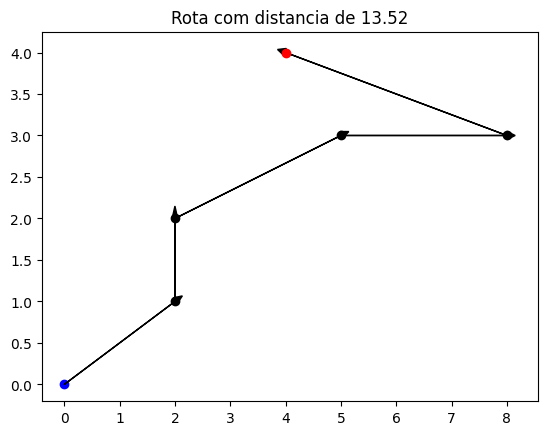

In [81]:
desenhar_rota(melhor_rota)

In [84]:
def modelo_matematico(origem, destino, enderecos):

  G = criar_grafo(origem, destino, enderecos)
  n = G.number_of_nodes()

  modelo = pywraplp.Solver.CreateSolver("SCIP")

  # Variaveis de decisao
  x = {}
  for i,j in G.edges():
    x[(i,j)] = modelo.BoolVar(name=f"x[{i,j}]")

  u = {}
  for i in G.nodes():
    u[i] = modelo.NumVar(lb=1.0, ub=n, name=f"u[{i}]")

  # Funcao objetivo
  modelo.Minimize(sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges()))

  #Restricoes
  for i in G.nodes():
    if i!='destino':
      modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)

    if i!='origem':
      modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

  for i,j in G.edges():
    modelo.Add(u[i] - u[j] + n*x[i,j] <= n -1)

  # Resolucao
  status = modelo.Solve()

  # Formatacao dos resultados
  melhor_rota = []
  distancia_percorrida = float('inf')

  status_descricao = {pywraplp.Solver.OPTIMAL: 'Ótima', pywraplp.Solver.FEASIBLE: 'Viável'}

  if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print("Solução ", status_descricao[status])
    distancia_percorrida = modelo.Objective().Value()

    melhor_rota = [0]*n
    for i in G.nodes():
      indice = round(u[i].solution_value())-1
      melhor_rota[indice] = G.nodes[i]["local"]

  return melhor_rota, distancia_percorrida

Solução  Ótima


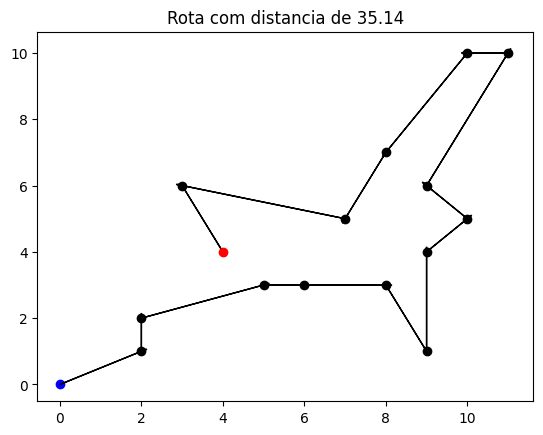

In [85]:
origem = (0,0)
destino = (4,4)

enderecos = [(2, 2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5), (9, 1), (11, 10), (3, 6), (10, 10)]
melhor_rota, distancia_percorrida = modelo_matematico(origem, destino, enderecos)

desenhar_rota(melhor_rota)

In [93]:
def modelo_matematico_com_heuristica(origem, destino, enderecos):

  G = criar_grafo(origem, destino, enderecos)
  n = G.number_of_nodes()

  modelo = pywraplp.Solver.CreateSolver("SCIP")
  modelo.SetTimeLimit(60*1000)
  
  rota_heuristica, distancia_heuristica = vizinho_mais_proximo(origem, destino, enderecos)

  # Variaveis de decisao
  x = {}
  for i,j in G.edges():
    x[(i,j)] = modelo.BoolVar(name=f"x[{i,j}]")

  u = {}
  for i in G.nodes():
    u[i] = modelo.NumVar(lb=1.0, ub=n, name=f"u[{i}]")

  # Funcao objetivo
  expr_distancia = sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges())
  modelo.Minimize(expr_distancia)
  
  #Restricoes
  for i in G.nodes():
    if i!='destino':
      modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)

    if i!='origem':
      modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

  for i,j in G.edges():
    modelo.Add(u[i] - u[j] + n*x[i,j] <= n -1)
    
  modelo.Add(expr_distancia <= distancia_heuristica)

  # Resolucao
  status = modelo.Solve()

  # Formatacao dos resultados
  melhor_rota = rota_heuristica
  distancia_percorrida = distancia_heuristica

  status_descricao = {pywraplp.Solver.OPTIMAL: 'Ótima', pywraplp.Solver.FEASIBLE: 'Viável'}

  if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print("Solução ", status_descricao[status])
    distancia_percorrida = modelo.Objective().Value()
    melhor_bound = modelo.Objective().BestBound()

    gap = 100*abs(distancia_percorrida - melhor_bound)/distancia_percorrida
    print("gap=", gap)
  
    melhor_rota = [0]*n
    for i in G.nodes():
      indice = round(u[i].solution_value())-1
      melhor_rota[indice] = G.nodes[i]["local"]

  return melhor_rota, distancia_percorrida

In [91]:
origem = (0, 0)
destino = (4, 4)

import random

enderecos = [(random.randint(0,100), random.randint(0,100)) for i in range(30)]
print(enderecos)

[(22, 82), (34, 80), (77, 51), (66, 20), (32, 70), (98, 75), (25, 74), (39, 19), (100, 16), (53, 76), (45, 87), (5, 13), (39, 19), (58, 7), (34, 57), (57, 30), (91, 27), (55, 36), (62, 61), (100, 28), (65, 18), (2, 9), (3, 10), (34, 12), (4, 65), (70, 9), (60, 69), (58, 96), (97, 5), (12, 16)]


In [94]:
menor_rota, distancia_percorrida = modelo_matematico_com_heuristica(origem, destino, enderecos)
print(distancia_percorrida)

Solução  Viável
gap= 9.400260869123386
480.4797981725373
